在这个教程中，你将会学到用python抓包抓取百度迁徙网站数据

<div class="alert alert-info"><h2>提供的基础数据是：</h2><p>
    没有，我们的数据无中生有<br><br></div>

受到疫情影响，今年的迁徙明显比去年总量少很多。  
因此，我有一个疑问：
>我们能不能抓下每个城市的迁徙数据，看看疫情后复工的情况现在怎么样了呢？  

最近，[百度迁徙](http://qianxi.baidu.com/)开放了迁徙的数据，直接公布在了网上非常的友好，这明摆着就是让我们抓的嘛！

# 爬虫的第一步：观察网站研究爬虫策略

抓包的原理:  
现在越来越多的网站是基于javascript动态加载的。他们的网页是一个html，这个html加载了javascript的脚本，然后再加载数据。这个时候如果我们直接抓静态网页，就会发现抓下来只有一行，就是他们引用了JavaScript的脚本，抓不到数据。
怎么办呢，首先我们要来了解一下如果我们在百度地图上搜索一条公交线，搜索结果是怎么出现的：
<img src="./resource/zhuabao.jpg"  style="width:1000px">  

在搜索框里面搜公交“71路”。浏览器会自动把这个关键词转换为查询条件提交给网络服务器，网络服务器根据条件返回数据，浏览器里面的JavaScript收到数据以后，对数据解析并绘制成公交线展示给我们看。  
所以爬虫可以在服务器返回数据的时候，把数据截取下来

好的！我们来实操一下，打开[百度迁徙](http://qianxi.baidu.com/)网页:

<img src="resource/zhuabao1.png"  style="width:1000px">

上面的**春节期间迁入上海趋势**这个折线图的数据，就是我们现在要抓的  
来看看抓取策略，右键打开检查，进入浏览器chrome自带的开发者工具(其他浏览器也有类似功能，这里以chrome为例):

<img src="resource/zhuabao2.png"  style="width:400px">

Network标签页下可记录网页的实时网络访问情况，勾选Preserve log选项可在网页打开新页面时保存之前的网络连接情况

<img src="resource/zhuabao3.png"  style="width:600px">

我们勾选Preserve log，然后刷新一下页面，找一下折线图的数据在哪里获取到了

<img src="resource/zhuabao4.png"  style="width:600px">


然后我们把这个访问链接复制下来：http://huiyan.baidu.com/migration/historycurve.jsonp?dt=province&id=310000&type=move_in&callback=jsonp_1584611749784_5326864

观察一下这个链接
<img src="resource/zhuabao5.png"  style="width:1000px">


所以，抓取策略很明显了！就只要改一下这个链接里面的参数即可

# 开始抓取

In [3]:
#抓取的包
import urllib
import urllib.request

#json文件解析
import json

#数据处理包
import pandas as pd
import numpy as np

In [4]:
cityname = '上海市'
adcode = '310000'

#构建url
url = r'http://huiyan.baidu.com/migration/historycurve.jsonp?dt=province&id='+str(adcode)+'&type=move_in&callback='

#抓取
request = urllib.request.Request(url)
response = urllib.request.urlopen(request)
data = response.read().decode('utf-8')
data

'({"errno":0,"errmsg":"SUCCESS","data":{"list":{"20190112":6.2175276,"20190113":5.8191372,"20190114":7.683174,"20190115":6.069654,"20190116":5.7759156,"20190117":6.1183512,"20190118":6.2400132,"20190119":6.4196064,"20190120":6.1418088,"20190121":7.3892088,"20190122":6.2027532,"20190123":6.38361,"20190124":6.5075076,"20190125":6.6069432,"20190126":6.630822,"20190127":6.1474788,"20190128":7.255818,"20190129":5.5640844,"20190130":5.2108272,"20190131":4.8215412,"20190201":4.5188604,"20190202":3.8527164,"20190203":3.639816,"20190204":3.3622128,"20190205":3.965922,"20190206":6.5205,"20190207":7.4600676,"20190208":9.447192,"20190209":12.4943472,"20190210":17.395074,"20190211":20.3837148,"20190212":17.3868768,"20190213":16.2005184,"20190214":14.8264668,"20190215":12.6163656,"20190216":11.3368572,"20190217":11.3284008,"20190218":11.9455236,"20190219":8.0118396,"20190220":8.7808212,"20190221":11.1269376,"20190222":9.7935804,"20190223":9.619074,"20190224":9.6119784,"20190225":9.7616664,"20190226"

这里，我把callback参数空着，这样抓下来的数据就不会带前缀。然后用json包读取数据（先把最外面的括号去掉）

In [6]:
datajson=json.loads(data[1:-1])

抓取下来的datajson变成了一个dict，接下来我们把2019年和2020年数据分开保存为两个表：

In [10]:
###############################你需要在下面写代码##################################
# 2019年和2020年数据分开保存
# 变量名为data2019_in和data2020_in
# data2019_in = 
# data2020_in =

###################################################################################
data2019_in.head()

,date,count
0,20190112,6.217528
1,20190113,5.819137
2,20190114,7.683174
3,20190115,6.069654
4,20190116,5.775916


In [ ]:
###############################    答  案   ##################################
# 2019年和2020年数据分开保存
data = pd.DataFrame([datajson['data']['list']]).T.reset_index()
data.columns = ['date','count']
data2019_in = data[data['date'].apply(lambda r:r[:4]=='2019')]
data2020_in = data[data['date'].apply(lambda r:r[:4]=='2020')]
###################################################################################

把上面抓取了迁入的数据，现在来抓一下迁出的数据吧，保存在data2019_out、data2020_out变量中

In [ ]:
###############################你需要在下面写代码##################################
# 抓取迁出的数据，保存在data2019_out、data2020_out变量中






###################################################################################

In [11]:
###############################    答  案   ##################################
url = r'http://huiyan.baidu.com/migration/historycurve.jsonp?dt=province&id='+str(adcode)+'&type=move_out&callback='
request = urllib.request.Request(url)
response = urllib.request.urlopen(request)
data = response.read().decode('utf-8')
datajson=json.loads(data[1:-1])
data = pd.DataFrame([datajson['data']['list']]).T.reset_index()
data.columns = ['date','count']
data2019_out = data[data['date'].apply(lambda r:r[:4]=='2019')]
data2020_out = data[data['date'].apply(lambda r:r[:4]=='2020')]
###################################################################################

# 计算人口恢复率！

上一步的过程中，我们把19年20年的数据保存在了data2019_in、data2020_in、data2019_out、data2020_out四个变量中，接下来考验大家pandas基本功的时候到了，用下面方法，以1月23日（春节前一天）为基准计算人口恢复率  
<img src="resource/zhuabao6.png"  style="width:600px">

In [ ]:
###############################你需要在下面写代码##################################
# 以1月23日（春节前一天）为基准计算人口恢复率






###################################################################################

In [12]:
###############################    答  案   ##################################
data2019_in.columns = ['date','incount']
data2019_out.columns = ['date','outcount']
data2019 = pd.merge(data2019_in,data2019_out,on = 'date')
data2019['incumsum'] = data2019['incount'].cumsum()
data2019['outcumsum'] = data2019['outcount'].cumsum()

data2020_in.columns = ['date','incount']
data2020_out.columns = ['date','outcount']
data2020 = pd.merge(data2020_in,data2020_out,on = 'date')
data2020['incumsum'] = data2020['incount'].cumsum()
data2020['outcumsum'] = data2020['outcount'].cumsum()

data2019 = data2019.reset_index()
data2019['year'] = '2019年(农历同期)'
data2019['data'] = data2019['incumsum']-data2019['outcumsum']
data2019['datarate'] = ((data2019['data']-data2019['data'].iloc[22])/abs(data2019['data'].iloc[22]))
data2020 = data2020.reset_index()
data2020['year'] = '2020年'
data2020['data'] = data2020['incumsum']-data2020['outcumsum']
data2020['datarate'] = ((data2020['data']-data2020['data'].iloc[22])/abs(data2020['data'].iloc[22]))
datatoplot = data2019[['index','year','data','datarate']].append(data2020[['index','year','data','datarate']])
###################################################################################

可视化出图：

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


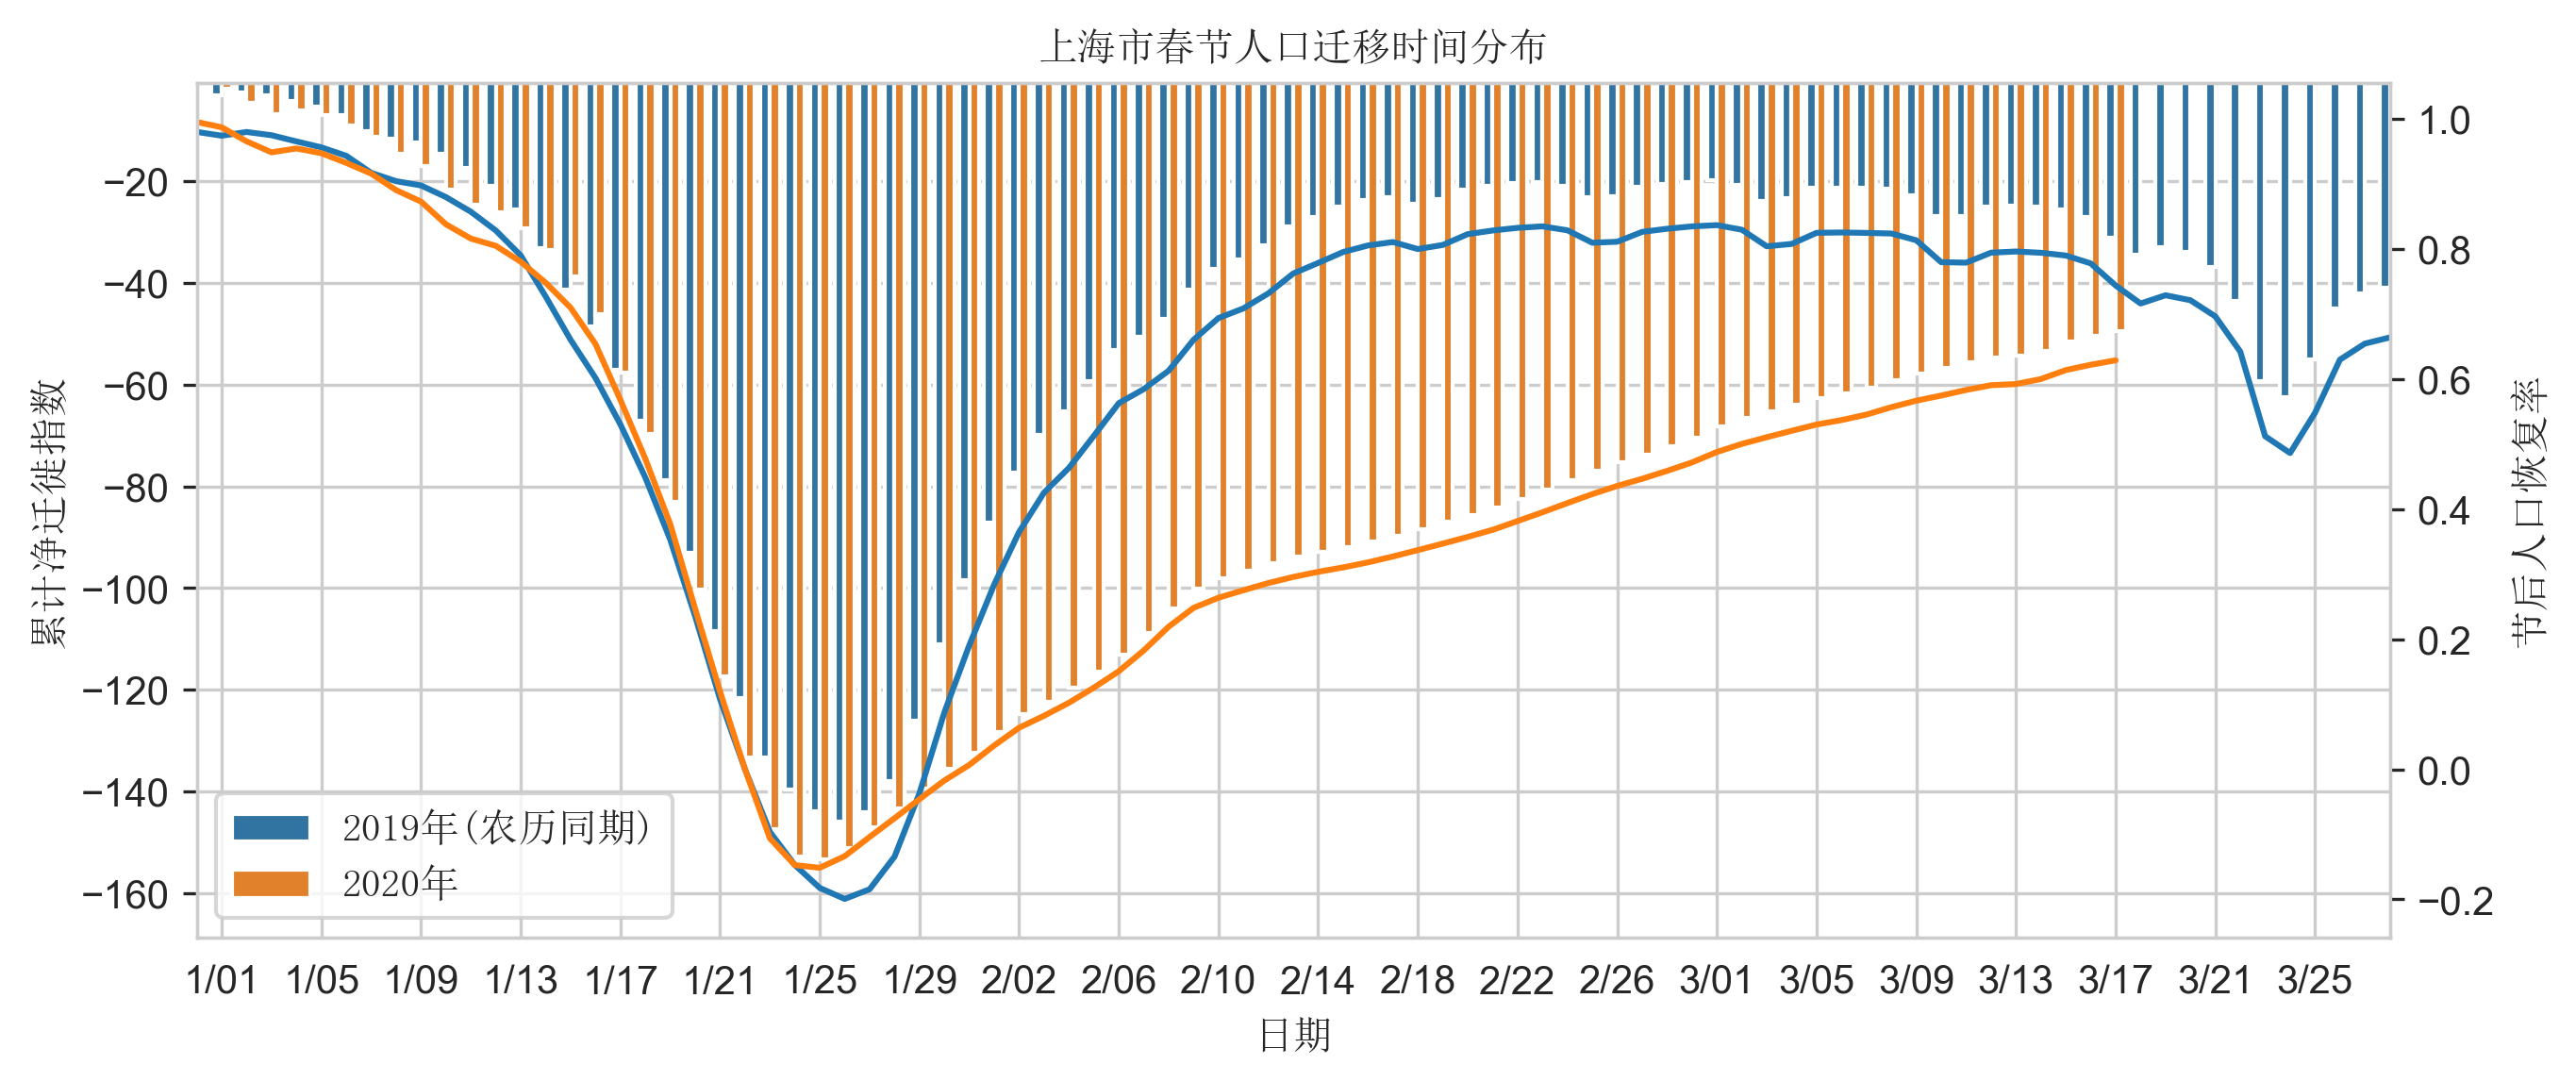

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

#读取字体文件，matplotlib默认是不能显示中文的，因此我们加载系统自带字体
from matplotlib.font_manager import FontProperties
font = FontProperties(fname=r"c:\windows\fonts\simsun.ttc", size=10)

#设置seaborn的主题
sns.set_style('whitegrid',{"xtick.major.size": 10 , "ytick.major.size": 10})

#创建图
fig = plt.figure(1,(10,4),dpi = 300)
ax = plt.subplot(111)

#绘制累计净迁徙指数的柱状图
sns.barplot(x = 'index',y='data',hue = 'year',data = datatoplot,ax = ax)


vmin = (int(data2020['data'].min()/30)-1)*30
ticks = pd.DataFrame(list(range(0,vmin-1,int(vmin/6))))

#显示网格
plt.grid(zorder = 0)

#纵轴标题
plt.ylabel('累计净迁徙指数',fontproperties = font)

#图例
plt.legend(prop = font)

#横轴标题
plt.xlabel('日期',fontproperties = font)
plt.ylim(datatoplot['data'].min()*1.1,datatoplot['data'].max()*1.1)

#反转副坐标轴绘制人口回复率
ax1 = ax.twinx()
sns.lineplot(x = 'index',y=datatoplot['datarate'],hue = 'year',data = datatoplot,ax = ax1,legend = None)

#计算横轴的日期
from datetime import datetime,timedelta
d = []
for i in range(90):
    datetime_date = datetime.strptime('20200101', "%Y%m%d")+i*timedelta(days=1)
    d.append(datetime_date.strftime("%Y%m%d"))
datelist = pd.DataFrame(d)[0]


plt.xticks(pd.DataFrame(range(0,len(datelist),4))+1,datelist.apply(lambda r:r[-3]+'/'+r[-2:]).iloc[range(0,len(datelist),4)])
ticks2 = (1-1.2*ticks/ticks.min())
plt.xlim(0,len(data2020['date'])+10)


plt.xlabel('日期',fontproperties = font)
plt.ylabel('节后人口恢复率',fontproperties = font)
plt.title(cityname+'春节人口迁移时间分布',fontproperties = font)
plt.grid('off')

plt.show()

# 作业

尝试绘制一下全国各城市的人口回复率，观察一下：
> 大城市和小城市，沿海地区和内陆地区的人口恢复率有什么区别，为什么会有这种区别？